# Dual Active Bridge Power converter 

This topology is comprised of a 1-phase inverter, a transformer for isolation purpose and a full bridge rectifier.

# SIMBA circuit
![DAB](DAB_SIMBA.png)

The control stage allows to extract the duty cycle by a C block and generate the phase shift + PWM signals.

Simulation settings : 
* predictive time step (variable) 
* minimum time step: 1E-09
* simulation time: 0.2s


### Run Simulation 

In [1]:
# Load modules
from aesim.simba import JsonProjectRepository
import matplotlib.pyplot as plt
import os 
import csv
import numpy as np

In [2]:
# Load functions
# calculate average value
def average_value(time, waveform):
    """average_value() returns the average value of a time waveform equal time steps are not required"""

    cum_sum = 0
    range_idx = range(0, len(time)-1, 1)

    for idx in range_idx:
        cum_sum += (time[idx + 1] - time[idx]) * (waveform[idx+1] + waveform[idx]) /2
    return (1 / (time[-1] - time[0]) * cum_sum)

In [4]:
# Retrieve SIMBA results by loading csv files and apply average calculation for DC signals

#Voltage SIMBA
Time = []
Vsimba = []

# Get Current Working Directory
file_path = os.path.join(os.getcwd(), "Vout_DAB_2.csv")
SIMBA_csv_file = open(file_path)
for i, line in enumerate(csv.reader(SIMBA_csv_file)):
   if i > 0:
    Time.append(float(line[0]))
    Vsimba.append(float(line[1]))
Time = np.array(Time)
Vsimba = np.array(Vsimba)
Vsimba_mean = average_value(Time, Vsimba)
print("SIMBA Output Voltage average = " + str(Vsimba_mean))



SIMBA Output Voltage average = 373.88224025843056


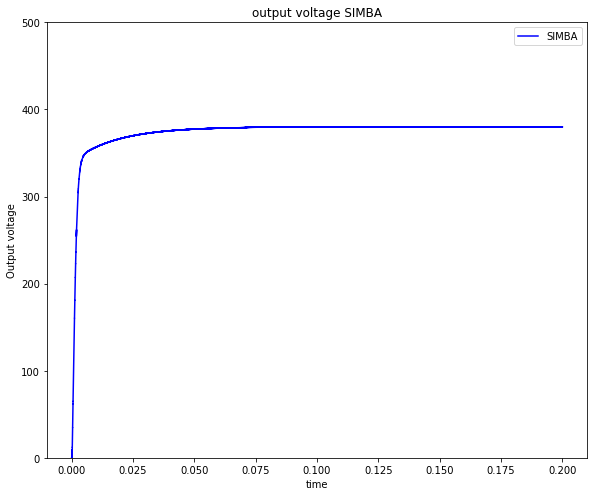

In [5]:
# Plot figure with graphs
fig = plt.figure(figsize = (16, 7))

ax = fig.add_subplot(121)
ax.plot(Time, Vsimba, "b")
ax.set_xlabel('time')
ax.set_ylabel('Output voltage')
ax.set_title("output voltage SIMBA")
ax.legend(["SIMBA"])
ax.set_ylim((0,500))

fig.tight_layout()

plt.show()